#creating a dataframe


In [1]:
# mount a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# library imports

import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randint 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# creating a pandas dataframe

profiles = pd.DataFrame(columns=['Age', 'Gender', 'Hobbies', 'Music', 'Movies'])
profiles.to_csv('/content/drive/MyDrive/Profiles.csv', index=False)   # store dataframe to google drive

In [4]:
# reading a csv file

df = pd.read_csv('/content/drive/MyDrive/Profiles.csv')
df.head()

,Age,Gender,Hobbies,Music,Movies


In [5]:
# entering the values in the dataframe

if len(df.index) < 100:
  for i in range(100):
    #df.drop(df.index[i])
    #new_row = {'Gender': 1, 'Age': 23, 'Hobbies':3, 'Movies':5, 'Music':5}
    new_row = {'Gender': randint(0,2), 'Age': randint(20, 30), 'Hobbies': random.uniform(1, 10), 'Movies': random.uniform(1,10), 'Music': random.uniform(1,10)}
    df = df.append(new_row, ignore_index=True)

df.head(10)


,Age,Gender,Hobbies,Music,Movies
0,25.0,0.0,2.946478,8.873107,5.768204
1,27.0,0.0,6.019776,5.265957,9.210989
2,29.0,1.0,1.638441,5.427463,6.189025
3,25.0,1.0,7.194375,2.560416,8.134584
4,28.0,1.0,6.405804,9.323237,1.793573
5,27.0,1.0,8.269868,9.396952,7.148955
6,28.0,0.0,3.223796,2.940016,5.542013
7,27.0,1.0,8.927755,7.693737,5.327966
8,24.0,1.0,2.618935,6.820018,4.992629
9,24.0,0.0,2.216755,9.257009,7.100814


Gender: 1 = M
        0 = F

Age: Between 20 to 30

Hobbies, Movies, Music: Preffered between scale of 1 to 10  


#data preprocessing

In [6]:
df.shape

(100, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      100 non-null    float64
 1   Gender   100 non-null    float64
 2   Hobbies  100 non-null    float64
 3   Music    100 non-null    float64
 4   Movies   100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [133]:
corr = df.corr()
corr
#sns.heatmap(corr)

,Age,Gender,Hobbies,Music,Movies
Age,1.000000,0.040064,0.142890,0.154435,-0.083758
Gender,0.040064,1.000000,0.140171,0.156262,0.008204
Hobbies,0.142890,0.140171,1.000000,0.046172,-0.006308
Music,0.154435,0.156262,0.046172,1.000000,-0.096926
Movies,-0.083758,0.008204,-0.006308,-0.096926,1.000000


In [8]:
df.describe()

,Age,Gender,Hobbies,Music,Movies
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24.550000,0.480000,5.829589,5.941059,5.420641
std,2.811862,0.502117,2.723996,2.662857,2.594124
min,20.000000,0.000000,1.117880,1.263216,1.036959
25%,22.000000,0.000000,3.589687,3.589336,3.245019
50%,24.000000,0.000000,6.200682,5.873716,5.460483
75%,27.000000,1.000000,8.133115,8.238759,7.717118
max,29.000000,1.000000,9.992527,9.958860,9.843725


#data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


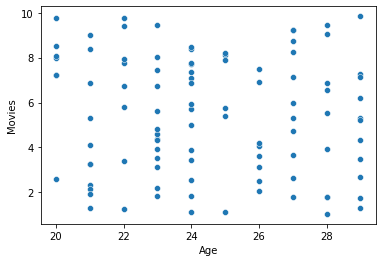

In [9]:
sns.scatterplot(df['Age'], df['Movies'])
plt.xlabel('Age')
plt.ylabel('Movies')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


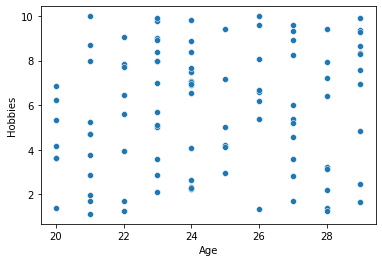

In [10]:
sns.scatterplot(df['Age'], df['Hobbies'])
plt.xlabel('Age')
plt.ylabel('Hobbies')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


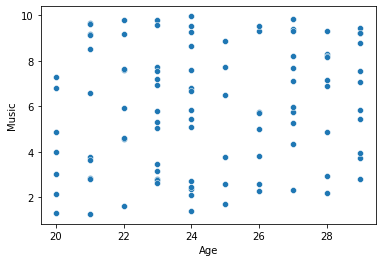

In [11]:
sns.scatterplot(df['Age'], df['Music'])
plt.xlabel('Age')
plt.ylabel('Music')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


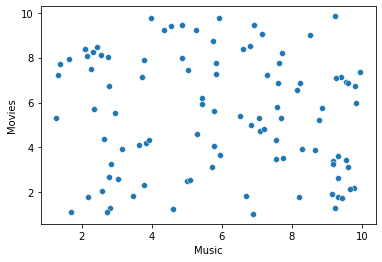

In [12]:
sns.scatterplot(df['Music'], df['Movies'])
plt.xlabel('Music')
plt.ylabel('Movies')
plt.show()

#clustering algorithm

In [107]:
# normalizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.531308e-16,-6.661338e-17,9.348078e-16,-2.039341e-16,9.936496e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.626297e+00,-9.607689e-01,-1.738419e+00,-1.765551e+00,-1.698364e+00
25%,-9.114412e-01,-9.607689e-01,-8.264281e-01,-8.876071e-01,-8.428981e-01
50%,-1.965854e-01,-9.607689e-01,1.369172e-01,-2.541713e-02,1.543600e-02
75%,8.756984e-01,1.040833e+00,8.499020e-01,8.672171e-01,8.897212e-01
max,1.590554e+00,1.040833e+00,1.535945e+00,1.516432e+00,1.713629e+00


In [14]:
# defining the k-means 

kmeans = KMeans(n_clusters=2, init='k-means++')   # k-means++ generally produce a better result than k-means 

#fitting the data in kmeans on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# checking the inertia
kmeans.inertia_

395.4261781998822

In [43]:
# calculating centroids
centers = kmeans.cluster_centers_

Text(0, 0.5, 'Inertia')

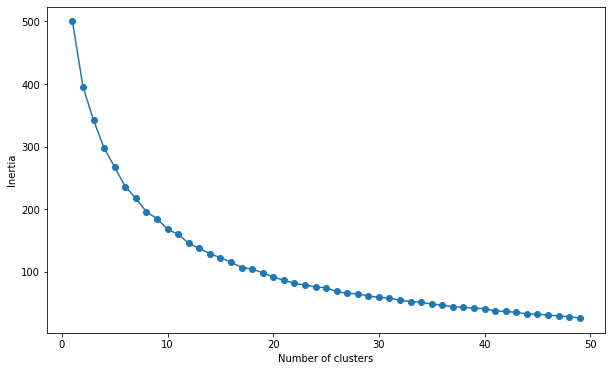

In [44]:
# fitting k-means multiple times
SSE = []    # sum of squared errors

for cluster in range(1, 50):
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)

# converting the results into dataframe and plotting them

frame = pd.DataFrame({'Cluster': range(1,50), 'SSE': SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In the above graph, the K-Means is run for 50 times and inertia is observed. Inertia tells that how many clusters to make. From the *elbow* curve,  clusters can be chosen where there is elbow.

In [126]:
# K Means using 8 clusters from the above graph 

kmeans = KMeans(n_jobs = -1,n_clusters= 8, init='k-means++')
kmeans.fit(data_scaled)
predict = kmeans.predict(data_scaled)

y_kmeans = kmeans.fit_predict(data_scaled)    #predict that which value will be in which cluster
y_kmeans

array([7, 6, 0, 1, 5, 5, 6, 5, 0, 7, 0, 5, 6, 5, 1, 5, 1, 5, 5, 3, 1, 7,
       2, 7, 1, 6, 6, 5, 5, 7, 7, 5, 4, 3, 7, 5, 1, 6, 2, 6, 5, 5, 7, 4,
       7, 4, 0, 4, 2, 5, 4, 2, 4, 7, 0, 5, 3, 4, 5, 4, 1, 2, 7, 2, 0, 4,
       1, 3, 1, 7, 3, 7, 5, 5, 6, 0, 5, 1, 1, 6, 1, 6, 6, 2, 0, 1, 5, 6,
       6, 2, 6, 3, 6, 1, 6, 0, 1, 2, 5, 1], dtype=int32)

In [115]:
# viewing how many entries are there in which cluster

frame = pd.DataFrame(data_scaled)
frame['Cluster'] =  predict
frame['Cluster'].value_counts()

2    16
3    15
0    14
4    12
6    11
5    11
1    11
7    10
Name: Cluster, dtype: int64

In [ ]:
#frame.info()

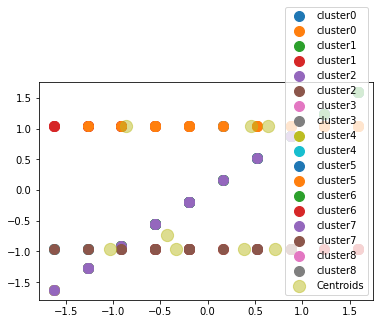

In [130]:
#plotting the clusters

for i in range(9):
  for j in range(2):
    plt.scatter(data_scaled[y_kmeans == i, 0], data_scaled[y_kmeans == i, j], s=100, label='cluster'+str(i), cmap='viridis')

#plt.scatter(data_scaled[:,0],data_scaled[:,1])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150,  label = 'Centroids' , alpha=0.5)
#plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='black', s=100, alpha=0.5)
    
plt.legend(loc='lower right')
plt.show()

In [127]:
kmeans.predict(np.array([[30.5,0,9,9.7,8.0]]))

array([5], dtype=int32)